Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats

In [2]:
df = pd.read_csv('EV_stations.csv')
df

,sessionId,kwhTotal,dollars,created,ended,startTime,endTime,chargeTimeHrs,weekday,platform,...,managerVehicle,facilityType,Mon,Tues,Wed,Thurs,Fri,Sat,Sun,reportedZip
0,1366563,7.78,0.00,0014-11-18 15:40:26,0014-11-18 17:11:04,15,17,1.510556,Tue,android,...,0,3,0,1,0,0,0,0,0,0
1,3075723,9.74,0.00,0014-11-19 17:40:26,0014-11-19 19:51:04,17,19,2.177222,Wed,android,...,0,3,0,0,1,0,0,0,0,0
2,4228788,6.76,0.58,0014-11-21 12:05:46,0014-11-21 16:46:04,12,16,4.671667,Fri,android,...,0,3,0,0,0,0,1,0,0,0
3,3173284,6.17,0.00,0014-12-03 19:16:12,0014-12-03 21:02:18,19,21,1.768333,Wed,android,...,0,3,0,0,1,0,0,0,0,0
4,3266500,0.93,0.00,0014-12-11 20:56:11,0014-12-11 21:14:06,20,21,0.298611,Thu,android,...,0,3,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3390,7021565,6.74,0.00,0015-10-01 16:31:18,0015-10-01 19:59:08,16,19,3.463889,Thu,ios,...,0,2,0,0,0,1,0,0,0,1
3391,3758092,6.86,0.00,0015-10-02 16:28:48,0015-10-02 19:27:05,16,19,2.971389,Fri,ios,...,0,2,0,0,0,0,1,0,0,1
3392,5858374,6.07,0.00,0015-09-30 16:54:22,0015-09-30 20:24:06,16,20,3.495556,Wed,android,...,0,3,0,0,1,0,0,0,0,1
3393,2586645,5.74,0.00,0015-09-24 11:43:02,0015-09-24 13:55:12,11,13,2.202778,Thu,ios,...,1,2,0,0,0,1,0,0,0,1


In [3]:
df.describe()

,sessionId,kwhTotal,dollars,startTime,endTime,chargeTimeHrs,distance,userId,stationId,locationId,managerVehicle,facilityType,Mon,Tues,Wed,Thurs,Fri,Sat,Sun,reportedZip
count,3.395000e+03,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,2330.000000,3.395000e+03,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000
mean,5.487001e+06,5.809629,0.118268,13.743446,16.455965,2.841488,18.652378,5.742395e+07,576789.678056,629934.460677,0.595582,2.428571,0.181443,0.187040,0.210015,0.216495,0.179676,0.018262,0.007069,0.703976
std,2.590657e+06,2.892727,0.492562,3.204370,3.406732,1.507472,11.420571,2.674772e+07,257486.310402,255620.993849,0.490851,0.811204,0.385442,0.390001,0.407379,0.411916,0.383974,0.133918,0.083793,0.456569
min,1.004821e+06,0.000000,0.000000,0.000000,0.000000,0.012500,0.856911,1.042767e+07,129465.000000,125372.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.234666e+06,4.350000,0.000000,11.000000,14.000000,2.110278,5.135871,3.329548e+07,369001.000000,481066.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.451498e+06,6.230000,0.000000,13.000000,16.000000,2.808889,21.023826,4.924181e+07,549414.000000,503205.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,7.746644e+06,6.830000,0.000000,17.000000,20.000000,3.544167,27.285053,8.188052e+07,864630.000000,878393.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.998981e+06,23.680000,7.500000,23.000000,23.000000,55.238056,43.059292,9.834581e+07,995505.000000,978130.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3395 entries, 0 to 3394
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sessionId       3395 non-null   int64  
 1   kwhTotal        3395 non-null   float64
 2   dollars         3395 non-null   float64
 3   created         3395 non-null   object 
 4   ended           3395 non-null   object 
 5   startTime       3395 non-null   int64  
 6   endTime         3395 non-null   int64  
 7   chargeTimeHrs   3395 non-null   float64
 8   weekday         3395 non-null   object 
 9   platform        3395 non-null   object 
 10  distance        2330 non-null   float64
 11  userId          3395 non-null   int64  
 12  stationId       3395 non-null   int64  
 13  locationId      3395 non-null   int64  
 14  managerVehicle  3395 non-null   int64  
 15  facilityType    3395 non-null   int64  
 16  Mon             3395 non-null   int64  
 17  Tues            3395 non-null   i

In [5]:
df.shape

(3395, 24)

In [6]:
df.columns

Index(['sessionId', 'kwhTotal', 'dollars', 'created', 'ended', 'startTime',
       'endTime', 'chargeTimeHrs', 'weekday', 'platform', 'distance', 'userId',
       'stationId', 'locationId', 'managerVehicle', 'facilityType', 'Mon',
       'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun', 'reportedZip'],
      dtype='object')

In [7]:
df.head(5)

,sessionId,kwhTotal,dollars,created,ended,startTime,endTime,chargeTimeHrs,weekday,platform,...,managerVehicle,facilityType,Mon,Tues,Wed,Thurs,Fri,Sat,Sun,reportedZip
0,1366563,7.78,0.00,0014-11-18 15:40:26,0014-11-18 17:11:04,15,17,1.510556,Tue,android,...,0,3,0,1,0,0,0,0,0,0
1,3075723,9.74,0.00,0014-11-19 17:40:26,0014-11-19 19:51:04,17,19,2.177222,Wed,android,...,0,3,0,0,1,0,0,0,0,0
2,4228788,6.76,0.58,0014-11-21 12:05:46,0014-11-21 16:46:04,12,16,4.671667,Fri,android,...,0,3,0,0,0,0,1,0,0,0
3,3173284,6.17,0.00,0014-12-03 19:16:12,0014-12-03 21:02:18,19,21,1.768333,Wed,android,...,0,3,0,0,1,0,0,0,0,0
4,3266500,0.93,0.00,0014-12-11 20:56:11,0014-12-11 21:14:06,20,21,0.298611,Thu,android,...,0,3,0,0,0,1,0,0,0,0


In [8]:
df.isnull().sum()

sessionId            0
kwhTotal             0
dollars              0
created              0
ended                0
startTime            0
endTime              0
chargeTimeHrs        0
weekday              0
platform             0
distance          1065
userId               0
stationId            0
locationId           0
managerVehicle       0
facilityType         0
Mon                  0
Tues                 0
Wed                  0
Thurs                0
Fri                  0
Sat                  0
Sun                  0
reportedZip          0
dtype: int64

In [9]:
df.isnull().sum().sum()

1065

In [10]:
#display null values
df[df.isnull().any(axis=1)]

,sessionId,kwhTotal,dollars,created,ended,startTime,endTime,chargeTimeHrs,weekday,platform,...,managerVehicle,facilityType,Mon,Tues,Wed,Thurs,Fri,Sat,Sun,reportedZip
0,1366563,7.78,0.00,0014-11-18 15:40:26,0014-11-18 17:11:04,15,17,1.510556,Tue,android,...,0,3,0,1,0,0,0,0,0,0
1,3075723,9.74,0.00,0014-11-19 17:40:26,0014-11-19 19:51:04,17,19,2.177222,Wed,android,...,0,3,0,0,1,0,0,0,0,0
2,4228788,6.76,0.58,0014-11-21 12:05:46,0014-11-21 16:46:04,12,16,4.671667,Fri,android,...,0,3,0,0,0,0,1,0,0,0
3,3173284,6.17,0.00,0014-12-03 19:16:12,0014-12-03 21:02:18,19,21,1.768333,Wed,android,...,0,3,0,0,1,0,0,0,0,0
4,3266500,0.93,0.00,0014-12-11 20:56:11,0014-12-11 21:14:06,20,21,0.298611,Thu,android,...,0,3,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3207,1865681,0.00,0.00,0015-09-25 19:10:00,0015-09-25 19:11:08,19,19,0.018889,Fri,ios,...,1,3,0,0,0,0,1,0,0,1
3209,7155296,0.00,0.00,0015-10-02 19:16:23,0015-10-02 19:18:07,19,19,0.028889,Fri,ios,...,1,3,0,0,0,0,1,0,0,1
3210,7688636,0.00,0.00,0015-10-02 19:18:45,0015-10-02 19:20:08,19,19,0.023056,Fri,ios,...,1,3,0,0,0,0,1,0,0,1
3282,5181950,0.00,0.00,0015-09-23 11:02:55,0015-09-23 13:03:05,11,13,2.002778,Wed,ios,...,1,2,0,0,1,0,0,0,0,1


In [11]:
# Number of duplicate entries
print('Duplicate entries found in this dataset = {}.' .format(df.duplicated().sum()))

Duplicate entries found in this dataset = 0.


In [12]:
# Column distribution
ids = ['sessionId','userId', 'stationId', 'locationId']
numerical = ['kwhTotal', 'dollars', 'chargeTimeHrs', 'distance']
datetime = ['created', 'ended']
categorical = ['startTime', 'endTime', 'weekday', 'platform','managerVehicle', 'facilityType','reportedZip']

print('There are {} id variables'.format(len(ids)))
print('There are {} datetime variables'.format(len(datetime)))
print('There are {} numerical variables'.format(len(numerical)))
print('There are {} categorical variables'.format(len(categorical)))
print('There are 7 dummy variables')

There are 4 id variables
There are 2 datetime variables
There are 4 numerical variables
There are 7 categorical variables
There are 7 dummy variables


In [13]:
df[numerical].describe()

,kwhTotal,dollars,chargeTimeHrs,distance
count,3395.000000,3395.000000,3395.000000,2330.000000
mean,5.809629,0.118268,2.841488,18.652378
std,2.892727,0.492562,1.507472,11.420571
min,0.000000,0.000000,0.012500,0.856911
25%,4.350000,0.000000,2.110278,5.135871
50%,6.230000,0.000000,2.808889,21.023826
75%,6.830000,0.000000,3.544167,27.285053
max,23.680000,7.500000,55.238056,43.059292


### Total energy usage (Kwh) and Charge time

In [14]:
df["chargeTimeMins"] = df["chargeTimeHrs"] * 60

In [15]:
df.query("kwhTotal == 0").chargeTimeMins.describe()

count     55.000000
mean      27.340000
std       72.045255
min        0.750000
25%        1.175000
50%        1.416667
75%        1.733333
max      403.116667
Name: chargeTimeMins, dtype: float64

55 sessions had 0 kwh charged. However, they all had non-zero charge times.

### Zero energy charged

In [16]:
df_zero_charged = df.query("kwhTotal == 0")
df_zero_charged.sort_values(by='chargeTimeMins').head()

,sessionId,kwhTotal,dollars,created,ended,startTime,endTime,chargeTimeHrs,weekday,platform,...,facilityType,Mon,Tues,Wed,Thurs,Fri,Sat,Sun,reportedZip,chargeTimeMins
1361,6319362,0.0,0.0,0015-04-01 11:33:20,0015-04-01 11:34:05,11,11,0.012500,Wed,ios,...,3,0,0,1,0,0,0,0,1,0.750000
2235,8585893,0.0,0.0,0015-10-01 11:08:22,0015-10-01 11:09:08,11,11,0.012778,Thu,android,...,2,0,0,0,1,0,0,0,0,0.766667
2234,4426355,0.0,0.0,0015-10-01 11:07:19,0015-10-01 11:08:07,11,11,0.013333,Thu,android,...,2,0,0,0,1,0,0,0,0,0.800000
379,5006104,0.0,0.0,0015-04-01 15:28:11,0015-04-01 15:29:04,15,15,0.014722,Wed,ios,...,3,0,0,1,0,0,0,0,1,0.883333
2236,5891728,0.0,0.0,0015-10-01 11:09:14,0015-10-01 11:10:08,11,11,0.015000,Thu,android,...,2,0,0,0,1,0,0,0,0,0.900000


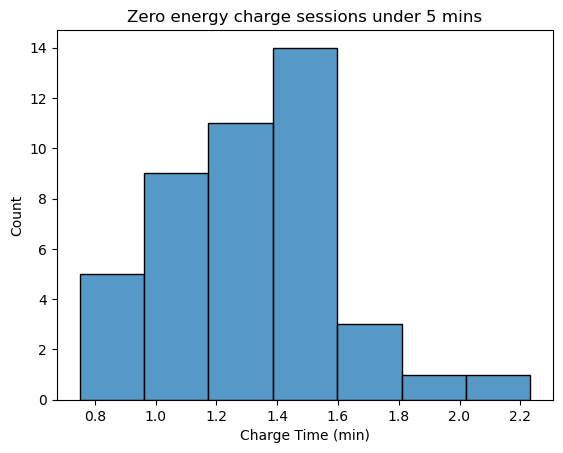

In [17]:
sns.histplot(df_zero_charged.query("chargeTimeMins < 5").chargeTimeMins)
plt.title("Zero energy charge sessions under 5 mins")
plt.xlabel('Charge Time (min)')
plt.show()

In [18]:
len(df_zero_charged.query("chargeTimeMins < 5"))

44

### Total energy usage (Kwh)

In [19]:
print(df.kwhTotal.mean())
print(df.kwhTotal.median())

5.809628865979382
6.23


The mean kilowatt hours charged was 5.8. The median kilowatt hours charged was 6.2.

In [20]:
df_clean = df.drop(df[df['kwhTotal'] == 0].index)
print(df_clean.kwhTotal.mean())
print(df_clean.kwhTotal.median())

5.905296407185628
6.28


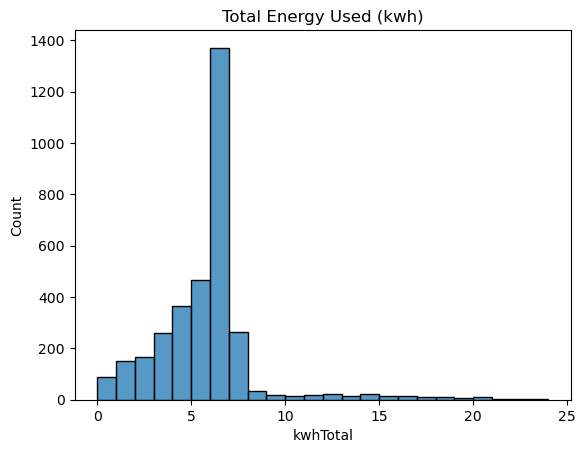

In [21]:
sns.histplot(df_clean.kwhTotal, binwidth=1).set(title="Total Energy Used (kwh)");

The most common amount charged was 5-6 kilowatt hours.

### Charge Time

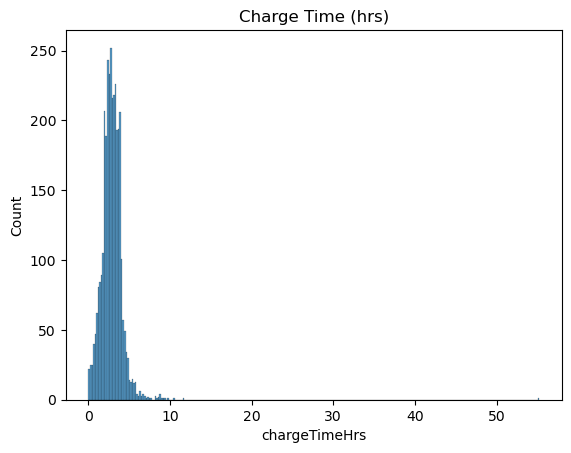

In [22]:
sns.histplot(df_clean.chargeTimeHrs).set(title="Charge Time (hrs)");

In [23]:
df_clean.query("chargeTimeHrs > 10")

,sessionId,kwhTotal,dollars,created,ended,startTime,endTime,chargeTimeHrs,weekday,platform,...,facilityType,Mon,Tues,Wed,Thurs,Fri,Sat,Sun,reportedZip,chargeTimeMins
173,2162299,4.10,0.83,0015-01-26 18:09:47,0015-01-29 01:24:04,18,1,55.238056,Mon,ios,...,4,1,0,0,0,0,0,0,0,3314.283334
2523,1654818,7.23,6.42,0015-06-10 10:42:47,0015-06-10 21:12:05,10,21,10.488333,Wed,ios,...,3,0,0,1,0,0,0,0,1,629.300000
2553,4089662,7.05,7.50,0015-08-26 10:56:52,0015-08-26 22:32:05,10,22,11.586944,Wed,ios,...,3,0,0,1,0,0,0,0,1,695.216666


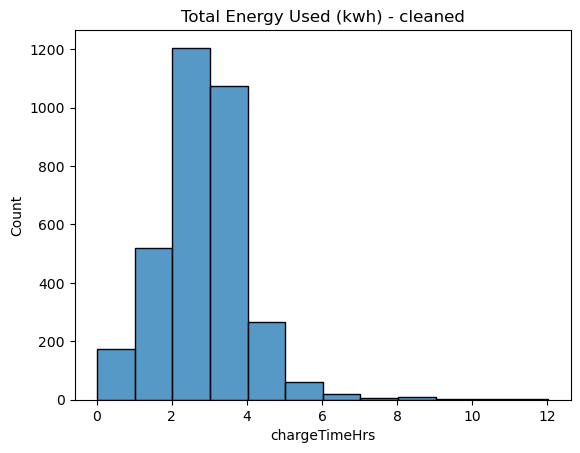

In [24]:
# Drop charge times greater than 24
df_clean.drop(df_clean[df_clean['chargeTimeHrs'] > 24].index, inplace=True)
sns.histplot(df_clean.chargeTimeHrs, binwidth=1).set(title="Total Energy Used (kwh) - cleaned");

In [25]:
print(df_clean.chargeTimeHrs.mean())
print(df_clean.chargeTimeHrs.median())

2.8650945891943693
2.826666667


### Facility Type

In [26]:
print(df.facilityType.value_counts())
print(df.shape[0])

3    1832
2     862
1     593
4     108
Name: facilityType, dtype: int64
3395


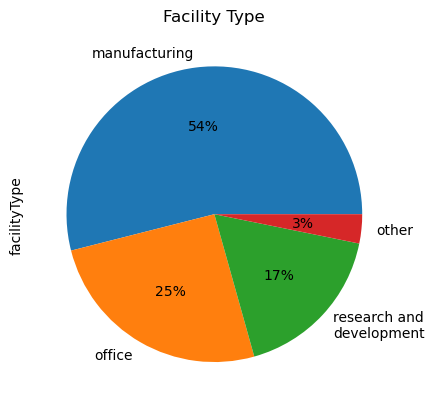

In [27]:
facility_types = {"manufacturing":1, "office":2, "research and \ndevelopment":3, "other":4}
df.facilityType.value_counts().plot.pie(y='facilityType', labels = facility_types, autopct='%.0f%%', title='Facility Type')
plt.show()

"manufacturing" was the most common facility type at 54% of the sessions.

### Amount Paid by User (dollars)

In [28]:
print(df.query("dollars == 0.0").dollars.count())
print(df.query("dollars == 0.0").dollars.count() / df.shape[0])

3016
0.8883652430044182


In [29]:
# Add a new categoric variable, free, for sessions with zero dollars
df_clean['free'] = df_clean['dollars'] == 0

# Drop rows where the total energy was zero but have non-zero dollars
df_clean.drop(df_clean[(df_clean['kwhTotal'] == 0) & (df_clean['dollars'] > 0.0)].index, inplace=True)

In [30]:
df_clean.query("free == False").dollars.describe()

count    377.000000
mean       1.055756
std        1.085323
min        0.500000
25%        0.500000
50%        0.500000
75%        1.170000
max        7.500000
Name: dollars, dtype: float64

88.8% of sessions were free. The average amount paid for non-free sessions was $1.06.

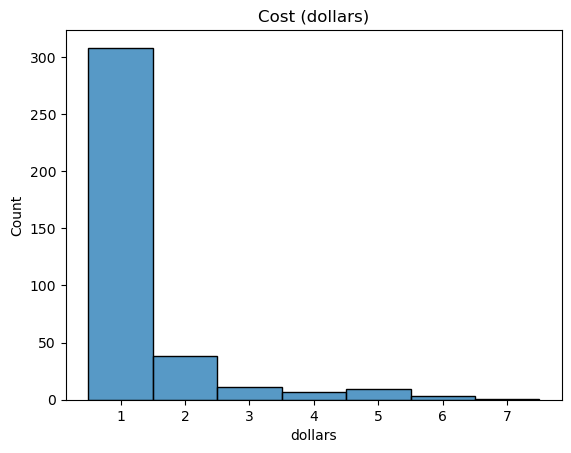

In [31]:
sns.histplot(df_clean.query("free == False").dollars, binwidth=1).set(title="Cost (dollars)");

In [32]:
df_clean['cost_per_kwh'] = df['dollars'] / df['kwhTotal']
df_clean.replace([np.inf, -np.inf], 0, inplace=True)
df_clean.query("free == False").sort_values(by="cost_per_kwh")

,sessionId,kwhTotal,dollars,created,ended,startTime,endTime,chargeTimeHrs,weekday,platform,...,Tues,Wed,Thurs,Fri,Sat,Sun,reportedZip,chargeTimeMins,free,cost_per_kwh
972,4926737,23.68,0.50,0015-10-03 07:18:43,0015-10-03 11:25:07,7,11,4.106667,Sat,android,...,0,0,0,0,1,0,0,246.400000,False,0.021115
962,2473111,21.14,0.50,0015-09-09 13:59:02,0015-09-09 18:28:11,13,18,4.485833,Wed,android,...,0,1,0,0,0,0,0,269.150000,False,0.023652
1914,8900391,20.38,0.50,0015-07-24 16:55:36,0015-07-24 21:18:06,16,21,4.375000,Fri,ios,...,0,0,0,1,0,0,1,262.500000,False,0.024534
546,5957528,19.06,0.50,0015-07-07 10:53:15,0015-07-07 15:23:06,10,15,4.497500,Tue,ios,...,1,0,0,0,0,0,0,269.850000,False,0.026233
1954,4895703,18.58,0.50,0015-10-01 12:34:24,0015-10-01 16:45:09,12,16,4.179167,Thu,ios,...,0,0,1,0,0,0,1,250.750000,False,0.026911
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2553,4089662,7.05,7.50,0015-08-26 10:56:52,0015-08-26 22:32:05,10,22,11.586944,Wed,ios,...,0,1,0,0,0,0,1,695.216666,False,1.063830
2550,6049068,0.44,0.50,0015-08-14 16:28:24,0015-08-14 20:41:06,16,20,4.211667,Fri,ios,...,0,0,0,1,0,0,1,252.700000,False,1.136364
3188,6424674,2.39,3.25,0015-09-23 15:30:20,0015-09-23 22:46:07,15,22,7.263056,Wed,android,...,0,1,0,0,0,0,1,435.783333,False,1.359833
2271,2118272,0.21,0.50,0015-08-13 10:29:48,0015-08-13 14:42:07,10,14,4.205278,Thu,ios,...,0,0,1,0,0,0,1,252.316667,False,2.380952


In [33]:
df_clean.query("free == False").cost_per_kwh.describe()

count    377.000000
mean       0.193957
std        0.251933
min        0.021115
25%        0.074963
50%        0.102041
75%        0.206096
max        2.450980
Name: cost_per_kwh, dtype: float64

For the paid sessions, that average cost per kilowatt hour was 19 cents.

### Day of the week

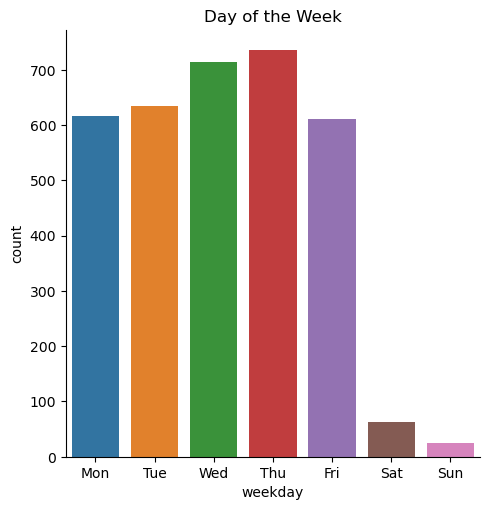

In [34]:
sns.catplot(df, x="weekday", kind="count", order=['Mon','Tue','Wed','Thu','Fri','Sat','Sun']).set(title="Day of the Week")
plt.show()

### Platform

In [35]:
df.platform.value_counts()

ios        2234
android    1155
web           6
Name: platform, dtype: int64

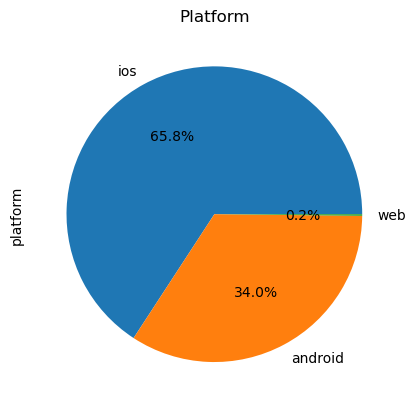

In [36]:
df.platform.value_counts().plot(kind='pie', autopct='%.1f%%', title="Platform");

### Distance from Home (mi)

In [37]:
print("There are {} missing values".format(df_clean.distance.isna().sum()))

There are 1009 missing values


In [38]:
df_clean.distance.fillna(df_clean.distance.mean(), inplace=True)

In [39]:
df_clean.distance.describe()

count    3339.000000
mean       18.652378
std         9.539583
min         0.856911
25%        17.688772
50%        18.652378
75%        24.519201
max        43.059292
Name: distance, dtype: float64

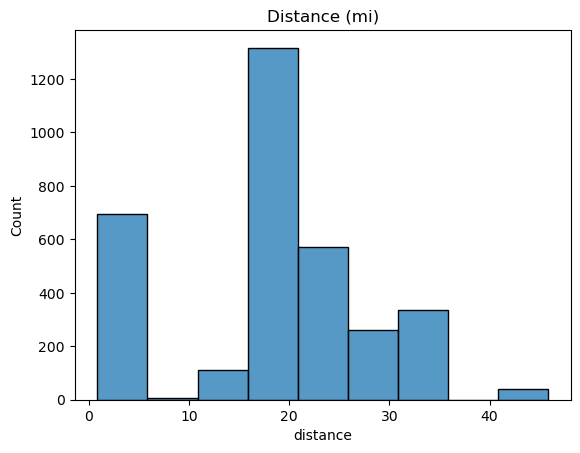

In [40]:
sns.histplot(df_clean.distance, binwidth=5).set(title="Distance (mi)");

In [41]:
df_clean.query("distance < 6")

,sessionId,kwhTotal,dollars,created,ended,startTime,endTime,chargeTimeHrs,weekday,platform,...,Tues,Wed,Thurs,Fri,Sat,Sun,reportedZip,chargeTimeMins,free,cost_per_kwh
862,9531439,1.79,0.0,0015-01-15 16:02:00,0015-01-15 16:40:07,16,16,0.635278,Thu,ios,...,0,0,1,0,0,0,1,38.116667,True,0.000000
863,4756166,2.38,0.0,0015-05-07 20:02:59,0015-05-07 22:43:06,20,22,2.668611,Thu,ios,...,0,0,1,0,0,0,1,160.116667,True,0.000000
864,2290411,1.52,0.0,0015-05-08 12:26:51,0015-05-08 12:58:07,12,12,0.521111,Fri,ios,...,0,0,0,1,0,0,1,31.266667,True,0.000000
865,1957117,6.53,0.5,0015-05-11 11:41:36,0015-05-11 15:49:06,11,15,4.125000,Mon,ios,...,0,0,0,0,0,0,1,247.500000,False,0.076570
866,8845048,3.64,0.0,0015-05-12 11:56:15,0015-05-12 15:45:07,11,15,3.814444,Tue,ios,...,1,0,0,0,0,0,1,228.866667,True,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3382,8981271,5.58,0.0,0015-09-30 16:39:31,0015-09-30 20:05:09,16,20,3.427222,Wed,ios,...,0,1,0,0,0,0,1,205.633333,True,0.000000
3383,1781196,6.94,0.5,0015-10-02 11:27:08,0015-10-02 15:49:06,11,15,4.366111,Fri,ios,...,0,0,0,1,0,0,1,261.966667,False,0.072046
3392,5858374,6.07,0.0,0015-09-30 16:54:22,0015-09-30 20:24:06,16,20,3.495556,Wed,android,...,0,1,0,0,0,0,1,209.733333,True,0.000000
3393,2586645,5.74,0.0,0015-09-24 11:43:02,0015-09-24 13:55:12,11,13,2.202778,Thu,ios,...,0,0,1,0,0,0,1,132.166667,True,0.000000


### Comparing Subgroups

In [42]:
print(categorical)

['startTime', 'endTime', 'weekday', 'platform', 'managerVehicle', 'facilityType', 'reportedZip']


In [43]:
print(numerical)

['kwhTotal', 'dollars', 'chargeTimeHrs', 'distance']


### By Facility Type

In [44]:
pd.pivot_table(df_clean, values=numerical, index=['facilityType'], aggfunc="mean")

,chargeTimeHrs,distance,dollars,kwhTotal
facilityType,,,,
1,2.467116,20.397841,0.035637,5.791613
2,2.895228,22.020484,0.126607,5.729241
3,2.933363,16.509481,0.127879,5.942943
4,3.676939,18.576601,0.377264,7.314528


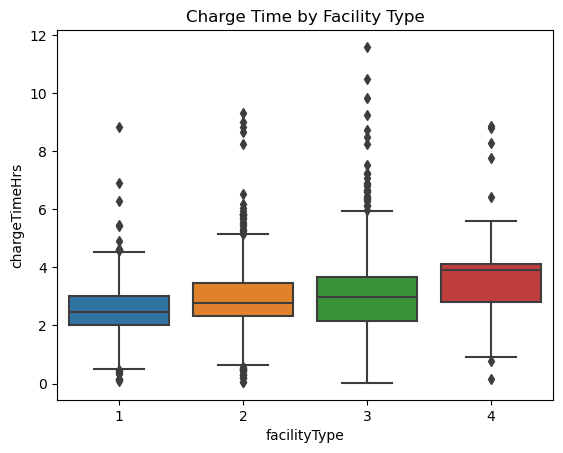

In [45]:
sns.boxplot(x='facilityType', y='chargeTimeHrs', data=df_clean).set(title="Charge Time by Facility Type");

### Anova test

In [46]:
model = ols('chargeTimeHrs ~ C(facilityType)', data=df_clean).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(facilityType),172.312970,3.0,43.512696,1.411120e-27
Residual,4402.268831,3335.0,NaN,NaN


### Normality

In [47]:
stats.shapiro(model.resid)

ShapiroResult(statistic=0.9531428813934326, pvalue=1.879558690587693e-31)

### Homogeneity of variances

In [48]:
stats.levene(df_clean['chargeTimeHrs'][df_clean['facilityType'] == 1],
             df_clean['chargeTimeHrs'][df_clean['facilityType'] == 2],
             df_clean['chargeTimeHrs'][df_clean['facilityType'] == 3],
             df_clean['chargeTimeHrs'][df_clean['facilityType'] == 4]) 

LeveneResult(statistic=14.388235526114839, pvalue=2.5916683829907404e-09)

### Free vs Paid Charging

In [49]:
pd.pivot_table(df_clean, values=numerical, index=['free'], aggfunc="mean")

,chargeTimeHrs,distance,dollars,kwhTotal
free,,,,
False,4.903563,19.330510,1.055756,6.682944
True,2.605641,18.566066,0.000000,5.806928


### Correlating numerical variables

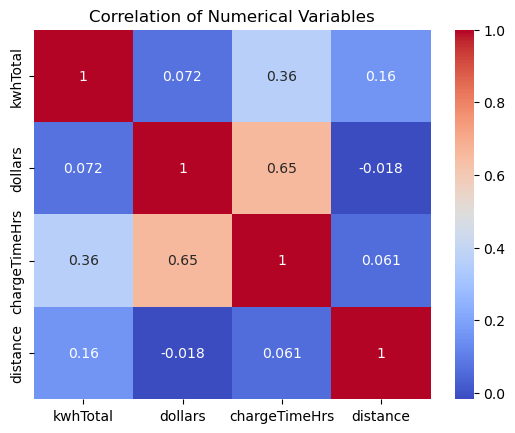

In [50]:
corr_matrix = df_clean[numerical].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm").set(title="Correlation of Numerical Variables");

### Paid sessions

[Text(0.5, 1.0, 'Correlation of Numerical Variables for Paid Sessions')]

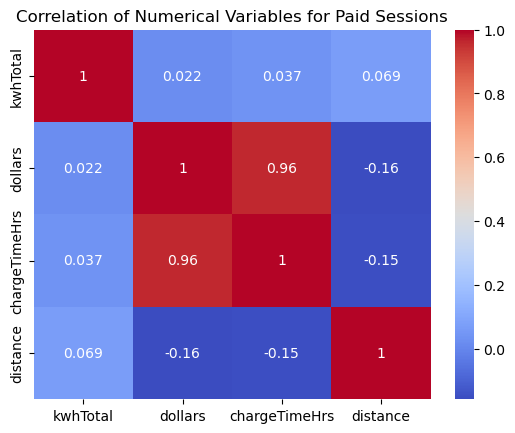

In [51]:
corr_matrix_paid = df_clean.query("free == False")[numerical].corr()
sns.heatmap(corr_matrix_paid, annot=True, cmap="coolwarm").set(title="Correlation of Numerical Variables for Paid Sessions")

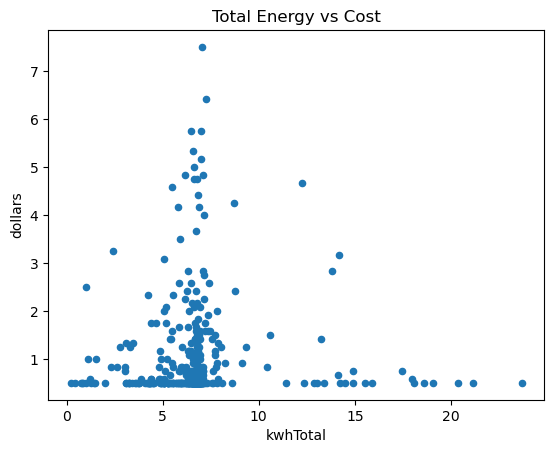

In [52]:
df_clean.query("free == False").plot.scatter(x='kwhTotal', y='dollars', title='Total Energy vs Cost');

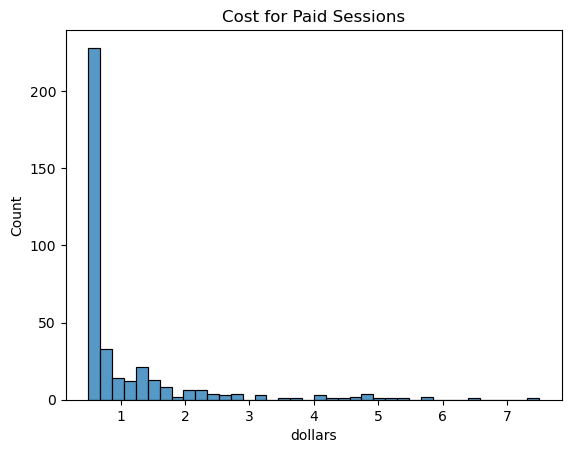

In [53]:
sns.histplot(df_clean.query("free == False" ).dollars).set(title="Cost for Paid Sessions");

In [54]:
df_50_cents = df_clean.query("dollars == 0.5")
num_50_cents = len(df_50_cents.dollars)
num_paid = len(df_clean.query("free == False").dollars)

print(num_50_cents)
print(num_paid)
print(num_50_cents/num_paid)

195
377
0.5172413793103449


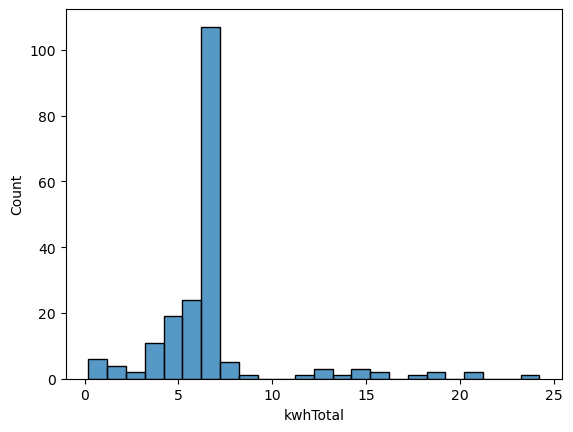

In [55]:
sns.histplot(df_50_cents.kwhTotal, binwidth=1);

### Correlations for Paid Sessions

### Conclusion